In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#### Load the data

In [14]:
df = pd.read_csv('badminton_dataset.csv')

In [15]:
df.head()

,Outlook,Temperature,Humidity,Wind,Play_Badminton
0,Overcast,Cool,High,Weak,Yes
1,Sunny,Mild,Normal,Strong,No
2,Rain,Mild,Normal,Strong,No
3,Sunny,Cool,High,Weak,Yes
4,Sunny,Cool,High,Strong,No


In [16]:
df.shape

(36, 5)

In [17]:
df = pd.get_dummies(df).astype(int)
df.head()

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak,Play_Badminton_No,Play_Badminton_Yes
0,1,0,0,1,0,0,1,0,0,1,0,1
1,0,0,1,0,0,1,0,1,1,0,1,0
2,0,1,0,0,0,1,0,1,1,0,1,0
3,0,0,1,1,0,0,1,0,0,1,0,1
4,0,0,1,1,0,0,1,0,1,0,1,0


#### We drop the Play_badminton_No column because of the redundancy

In [18]:
df = df.drop(["Play_Badminton_No"],axis=1)
df.head()

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak,Play_Badminton_Yes
0,1,0,0,1,0,0,1,0,0,1,1
1,0,0,1,0,0,1,0,1,1,0,0
2,0,1,0,0,0,1,0,1,1,0,0
3,0,0,1,1,0,0,1,0,0,1,1
4,0,0,1,1,0,0,1,0,1,0,0


#### Split the dataset into features and the target variable

In [19]:
X = df.drop(["Play_Badminton_Yes"],axis=1)
y = df["Play_Badminton_Yes"]

#### Split the datset into training and testing sets

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#### Training of the decision tree classifier

In [21]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train,y_train)

pred = dtree.predict(x_test)

#### Tree visualization

|--- Wind_Strong <= 0.50
|   |--- Outlook_Rain <= 0.50
|   |   |--- class: 1
|   |--- Outlook_Rain >  0.50
|   |   |--- class: 0
|--- Wind_Strong >  0.50
|   |--- class: 0



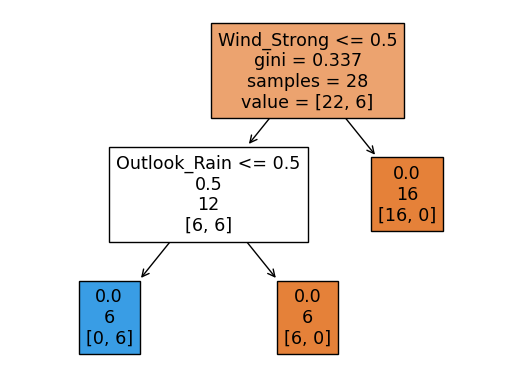

In [22]:
tree.plot_tree(dtree, feature_names = list(x_train.columns),
               label='root', filled=True)
print(tree.export_text(dtree, feature_names = X.columns.tolist()))

#### Evaluation

In [23]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         6

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



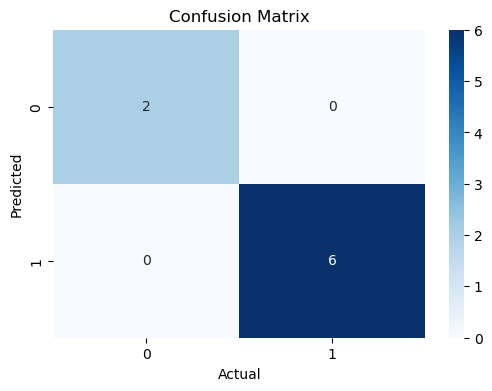

In [24]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap="Blues")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show()